# **PRÁCTICA 5:  Machine Learning - Parte 1: Árboles de decisión para la clasificaicón**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

## Árboles para clasificación

Para entender como funcionan los árboles de clasificación vamos a construirnos un árbol con un solo nodo.

Usaremos el dataset IRIS que tiene tres clases distintas. Las entradas `X` son de 4 variables.

La idea es encontrar de las 4 la variable que más ayuda a clasificar cuando fijamos un umbral de manera que clasificamos las muestras en dos grupos según superen dicho umbral.

Para decidir si los grupos generados están mejor clasificados tendremos que usar alguna métrica. En árboles de decisión se usan normalmente la entropía o el índice Gini.

La entropía viene definida por $$ E=\sum_c -P_c\log_2 P_c $$ donde $P_c$ es la probabilidad (estimada) de cada clase.

El índice Gini se define por $$ G = \sum_c P_c(1-Pc) = 1-\sum_c P_c^2 $$

Para ambas medidas si valen 0 significan que tenemos solo una clase en el grupo, caso contrario cuanto más alto su valor más clases tenemos en un grupo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

# Empezaremos usando la entropía. Luego probaremos Gini.
def entropy(y):
    prob = [np.sum(y==c) for c in set(y)]
    prob /= np.sum(prob)
    entropy = np.sum(-prob * np.log2(prob)) if all(prob != 0) else 0
    return entropy

X, y = load_iris(return_X_y=True)

Comenzamos calculando la entropía actual del conjunto de datos. Después buscaremos particiones de manera sistemática a ver si damos con una que al aplicarla disminuya el valor de la entropía. Recordemos que el objetivos sería encontrar grupos con entropía igual a cero, es decir, formados por una sola clase.

In [ ]:
# Entropía inicial de todo el conjunto
entropy_root = entropy(y)

# Empezamos la búsqueda
entropy_min = entropy_root
feature = 0
threshold = None
# Probamos con todas las variables de X ...
for feat in range(X.shape[1]):
    # Y para cada variable con todos sus posibles valores ...
    for th in X[:,feat]:
        # Índice para seleccionar las muestras por debajo del umbral th
        idx = X[:,feat] <= th
        # Dividimos en dos grupos, izquierda y derecha
        left = y[idx]
        right = y[~idx]
        # Medimos sus entropías
        entropy_left = entropy(left)
        entropy_right = entropy(right)
        # Y si la suma es menor que la actual, actualizamos
        if (entropy_left + entropy_right) < entropy_min:
            entropy_min = entropy_left + entropy_right
            feature = feat
            threshold = th


# Veamos si hemos tenido éxito en nuestra búsqueda
if threshold is None:
    print('Dividir no mejora')
else:
    print('Mejora con feature %d y threshold %f' %
            (feature, threshold))
    idx = X[:,feature] <= threshold
    left = y[idx]
    right = y[~idx]
    entropy_left = entropy(left)
    entropy_right = entropy(right)
    print('  entropía left  %5.3f' % entropy_left)
    print('  entropía right %5.3f' % entropy_right)
    print('  entropía total %5.3f' % (entropy_left+entropy_right),)
    print('  entropía root %5.3f ' % entropy_root)

    print('Muestras en left\n', left)
    print('Muestras en right\n', right)    

Mejora con feature 2 y threshold 1.900000
  entropía left  0.000
  entropía right 1.000
  entropía total 1.000
  entropía root 1.585 
Muestras en left
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Muestras en right
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


No está nada mal. Con solo una división hemos conseguido meter a todas las muestras de la clase 0 en el grupo de la izquierda!

Ahora solo falta repetir el procedimiento para subdividir al grupo de la derecha.

## Ejercicio 1:
Repite el procedimiento para el grupo de la derecha. ¿Se han divido perfectamente por clases?

In [ ]:
#Entropía inicial de todo el conjunto
Xright = X[~idx]
yright = X[idx]

entropy_root = entropy(right)

# Empezamos la búsqueda
entropy_min = entropy_root
feature = 0
threshold = None
# Probamos con todas las variables de X ...
for feat in range(Xright.shape[1]):
    # Y para cada variable con todos sus posibles valores ...
    for th in Xright[:,feat]:
        # Índice para seleccionar las muestras por debajo del umbral th
        idx = Xright[:,feat] <= th
        # Dividimos en dos grupos, izquierda y derecha
        left2 = right[idx]
        right2 = right[~idx]
        # Medimos sus entropías
        entropy_left2 = entropy(left2)
        entropy_right2 = entropy(right2)
        # Y si la suma es menor que la actual, actualizamos
        if (entropy_left2 + entropy_right2) < entropy_min:
            entropy_min = entropy_left2 + entropy_right2
            feature = feat
            threshold = th


# Veamos si hemos tenido éxito en nuestra búsqueda
if threshold is None:
    print('Dividir no mejora')
else:
    print('Mejora con feature %d y threshold %f' %
            (feature, threshold))
    idx = Xright[:,feature] <= threshold
    left2 = right[idx]
    right2 = right[~idx]
    entropy_left2 = entropy(left2)
    entropy_right2 = entropy(right2)
    print('  entropía left  %5.3f' % entropy_left2)
    print('  entropía right %5.3f' % entropy_right2)
    print('  entropía total %5.3f' % (entropy_left+entropy_right),)
    print('  entropía root %5.3f ' % entropy_root)

    print('Muestras en left\n', left2)
    print('Muestras en right\n', right2)
    
# No puede salir perfecto porque lo que estamos haciendo para dividir las clases es una linea recta(las particiones)
# por lo tanto pueden haber fallos entre uno y el otro.

Mejora con feature 3 y threshold 1.700000
  entropía left  0.445
  entropía right 0.151
  entropía total 1.000
  entropía root 1.000 
Muestras en left
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]
Muestras en right
 [1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


Tras ver el ejemplo anterior queda claro que el procedimiento general es ir generando subgrupos que separen las muestras en grupos de tal forma que idealmente queden grupos donde solo haya una clase de datos (entropía, o gini, igual a cero).

Crear un árbol de decisión es automatizar este proceso de divisiones.

### Vamos a crearnos nuestro primer árbol!

Primero nos creamos una clase 'Node' que tendrá la información necesaría para cada nodo del árbol.

In [ ]:
class Node:
    def __init__(self, y, entropy):
        # Como los nodos (o grupos) del árbol pueden contener más de una clase predeciremos la clase con más miembros.
        # Clases y cuantas hay de cada una
        classes, counts = np.unique(y, return_counts=True)
        self.predicted_class = classes[np.argmax(counts)] # La que tiene más componenetes 
        self.entropy = entropy # nos gaurdamos la entropía para ver como van las cosas. Nodos entropía 0 mejores nodos.
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None

    # Estas clases nos sirven para obtener información de un nodo al hacer 'print'
    def __repr__(self):
        self.show()
        return '\r'

    def show(self, depth=0):
        print('  ' * depth, 'entropy', self.entropy)
        print('  ' * depth, 'class', self.predicted_class)
        print('  ' * depth, 'feature', self.feature)
        print('  ' * depth, 'threshold', self.threshold)

Ahora nos creamos la clase 'Tree' propiamente dicha. Esta clase contendrá los nodos y nos permitirá entrenar el modelo y predecir con él.

In [ ]:
class Tree:
    def __init__(self, y, maxdepth=10):
        """
        y -- vector de clases
        maxdepth -- profundidad máxima del árbol
        """
        self.node = Node(y, entropy(y)) # Nodo raiz, los cuales vamos a dividir y crear los nuevos nodos.
        self.maxdepth = maxdepth

    # Igual que antes estas clases sirven para darnos
    # información del árbol al hacer 'print'
    def __repr__(self):
        self.show()
        return '\r'

    def show(self, depth=0, node=None):
        if node is None:
            node = self.node
        node.show(depth)
        if node.left is not None:
            print('  ' * depth, 'left')
            self.show(depth+1, node.left)
        if node.right is not None:
            print('  ' * depth, 'right')
            self.show(depth+1, node.right)

    
    # Esta función es clave. Es la misma que teníamos antes, la que se encarga de buscar una combinación de variable 
    # y umbral que disminuya la entropía.
    def find_split(self, X, y, node_entropy):
        """
        X, y -- training samples
        node_entropy -- la entropía del nodo actual
        """
        entropy_min = node_entropy

        # Si la entropía es cero no se puede mejorar!
        if entropy_min == 0:
            return None, None, None, None
        
        el, er = entropy_min, entropy_min
        feature, threshold = None, None
        for feat in range(X.shape[1]):
            for th in X[:,feat]:
                idx = X[:,feat] <= th
                entropy_l = entropy(y[idx])
                entropy_r = entropy(y[~idx])
                if (entropy_l + entropy_r) < entropy_min:
                    entropy_min = entropy_l + entropy_r
                    el = entropy_l
                    er = entropy_r
                    feature = feat
                    threshold = th

        return feature, threshold, el, er

    
    # Esta es la función que entrena el árbol.
    # Es recursiva (se llama así misma), así que atent@s!
    def fit(self, X, y, depth=0, node=None):
        """
        X, y -- training samples
        depth -- a qué profundidad estamos en el árbol
        node -- en qué nodo estamos
        """
        if depth >= self.maxdepth:
            return None

        if node is None:
            node = self.node

        # Buscamos la mejor variable y umbral
        feature, threshold, el, er = self.find_split(X, y, node.entropy)
        # Si lo encontramos ...
        if threshold is not None:
            # Guardamos los valores
            node.feature = feature
            node.threshold = threshold
            # Índice umbral
            idx = X[:, feature] <= threshold
            # Creamos y entrenamos el nodo izquierdo
            X_left, y_left = X[idx, :], y[idx]
            node.left = Node(y_left, el)
            self.fit(X_left, y_left, depth+1, node.left)
            # Creamos y entrenamos el nodo derecho
            X_right, y_right = X[~idx, :], y[~idx]
            node.right = Node(y_right, er)
            self.fit(X_right, y_right, depth+1, node.right)

    
    # Vamos con la predicción.
    # Primero hacemos una función para predecir una sola muestra
    def predict_one(self, xtest):
        # Empezamos del nodo raíz
        node = self.node
        # Vamos recorriendo sus hijos siempre que
        # tengamos el umbral definido
        while node.threshold is not None:
            if xtest[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        # Cuando llegamos al final emitimos la predicción
        return node.predicted_class

    # Con esta función predecimos más de una muestra a base
    # de predecirlas una a una con 'predict_one'
    def predict(self, Xtest):
        return np.array(
            [self.predict_one(xtest) for xtest in Xtest]
        )

### Vamos a probar nuestro árbol!

In [ ]:
# Primero lo creamos
tree = Tree(y)
# Luego lo entrenamos
tree.fit(X, y)
# A ver qué pinta tiene ...
print(tree)

 entropy 1.584962500721156
 class 0
 feature 2
 threshold 1.9
 left
   entropy 0.0
   class 0
   feature None
   threshold None
 right
   entropy 1.0
   class 1
   feature 3
   threshold 1.7
   left
     entropy 0.44506485705083865
     class 1
     feature 2
     threshold 5.1
     left
       entropy 0.31821529768323314
       class 1
       feature None
       threshold None
     right
       entropy 0.0
       class 2
       feature None
       threshold None
   right
     entropy 0.15109697051711368
     class 2
     feature None
     threshold None



In [ ]:
# Probémoslo en predicción
yp = tree.predict(X)
print(yp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Tiene buena pinta. Veamos ...
print('Accuracy', np.sum(yp == y) / len(yp))

Accuracy 0.9733333333333334


## Ejercicio 2:
Modifica el código para usar el índice Gini en lugar de la entropía y comprueba el funcionamiento.
Ayuda: solo hace falta modificar el código de la función entropía!

In [ ]:
def gini(y):
    prob = [np.sum(y==c) for c in set(y)]
    prob /= np.sum(prob)
    gini = np.sum(prob*(1-prob)) 
    return gini

In [ ]:
class Node_gini:
    def __init__(self, y, gini):
        # Como los nodos (o grupos) del árbol pueden 
        # contener más de una clase predeciremos la
        # clase con más miembros.
        # Clases y cuantas hay de cada una
        classes, counts = np.unique(y, return_counts=True)
        self.predicted_class = classes[np.argmax(counts)]
        self.gini = gini
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None

    # Estas clases nos sirven para obtener información
    # de un nodo al hacer 'print'
    def __repr__(self):
        self.show()
        return '\r'

    def show(self, depth=0):
        print('  ' * depth, 'gini', self.gini)
        print('  ' * depth, 'class', self.predicted_class)
        print('  ' * depth, 'feature', self.feature)
        print('  ' * depth, 'threshold', self.threshold)

In [ ]:
class Tree_gini:
    def __init__(self, y, maxdepth=10):
        """
        y -- vector de clases
        maxdepth -- profundidad máxima del árbol
        """
        self.node = Node_gini(y, gini(y)) #nodos
        self.maxdepth = maxdepth #máxima profundidad que yo quiero que tenga el árbol

    # Igual que antes estas clases sirven para darnos
    # información del árbol al hacer 'print'
    def __repr__(self):
        self.show()
        return '\r'

    def show(self, depth=0, node=None):
        if node is None:
            node = self.node
        node.show(depth)
        if node.left is not None:
            print('  ' * depth, 'left')
            self.show(depth+1, node.left)
        if node.right is not None:
            print('  ' * depth, 'right')
            self.show(depth+1, node.right)

    
    # Esta función es clave. Es la misma que teníamos
    # antes, la que se encarga de buscar una combinación
    # de variable y umbral que disminuya la gini.
    def find_split(self, X, y, node_gini):
        """
        X, y -- training samples
        node_gini -- la entropía del nodo actual
        """
        gini_min = node_gini

        # Si la gini es cero no se puede mejorar!
        if gini_min == 0:
            return None, None, None, None
        
        el, er = gini_min, gini_min
        feature, threshold = None, None
        for feat in range(X.shape[1]):
            for th in X[:,feat]:
                idx = X[:,feat] <= th
                gini_l = gini(y[idx])
                gini_r = gini(y[~idx])
                if (gini_l + gini_r) < gini_min:
                    gini_min = gini_l + gini_r
                    el = gini_l
                    er = gini_r
                    feature = feat
                    threshold = th

        return feature, threshold, el, er

    
    # Esta es la función que entrena el árbol.
    # Es recursiva (se llama así misma), así que atent@s!
    def fit(self, X, y, depth=0, node=None):
        """
        X, y -- training samples
        depth -- a qué profundidad estamos en el árbol
        node -- en qué nodo estamos
        """
        if depth >= self.maxdepth:
            return None

        if node is None:
            node = self.node

        # Buscamos la mejor variable y umbral
        feature, threshold, el, er = self.find_split(X, y, node.gini)
        # Si lo encontramos ...
        if threshold is not None:
            # Guardamos los valores
            node.feature = feature
            node.threshold = threshold
            # Índice umbral
            idx = X[:, feature] <= threshold
            # Creamos y entrenamos el nodo izquierdo
            X_left, y_left = X[idx, :], y[idx]
            node.left = Node_gini(y_left, el)
            self.fit(X_left, y_left, depth+1, node.left)
            # Creamos y entrenamos el nodo derecho
            X_right, y_right = X[~idx, :], y[~idx]
            node.right = Node_gini(y_right, er)
            self.fit(X_right, y_right, depth+1, node.right)

    
    # Vamos con la predicción.
    # Primero hacemos una función para predecir una sola muestra
    def predict_one(self, xtest):
        # Empezamos del nodo raíz
        node = self.node
        # Vamos recorriendo sus hijos siempre que
        # tengamos el umbral definido
        while node.threshold is not None:
            if xtest[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        # Cuando llegamos al final emitimos la predicción
        return node.predicted_class

    # Con esta función predecimos más de una muestra a base
    # de predecirlas una a una con 'predict_one'
    def predict(self, Xtest):
        return np.array(
            [self.predict_one(xtest) for xtest in Xtest]
        )

In [ ]:
# Primero lo creamos
tree_gini = Tree_gini(y)
# Luego lo entrenamos
tree_gini.fit(X, y)
# A ver qué pinta tiene ...
print(tree_gini)

 gini 0.6666666666666667
 class 0
 feature 2
 threshold 1.9
 left
   gini 0.0
   class 0
   feature None
   threshold None
 right
   gini 0.5
   class 1
   feature 3
   threshold 1.7
   left
     gini 0.1680384087791495
     class 1
     feature 2
     threshold 5.1
     left
       gini 0.10872781065088759
       class 1
       feature None
       threshold None
     right
       gini 0.0
       class 2
       feature None
       threshold None
   right
     gini 0.04253308128544422
     class 2
     feature None
     threshold None



In [ ]:
# Probémoslo en predicción
yp = tree_gini.predict(X)
print(yp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Tiene buena pinta. Veamos ...
print('Accuracy', np.sum(yp == y) / len(yp))

Accuracy 0.9733333333333334


## Árboles de decisión con scikit-learn
Nuestro árbol de juguete está muy bien para aprender, pero a la hora de clasificar "en serio" tendremos que buscar implementaciones más optimizadas.

En scikit-learn tenemos DecisionTreeClassifier. Repitamos rápidamente el ejercicio anterior usando este clasificador.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
dtc.fit(Xtrain, ytrain)
dtc.score(Xtest, ytest)

0.9555555555555556

scikit-learn nos da la posibilidad de representar el árbol gráficamente. Esto es muy relevante puesto que una de las características más importantes de los árboles de decisión es su facilidad para interpretarlos.

Una vez entrenado el árbol, este pone de manifiesto cuales son las variables más importantes en el proceso de clasificación, y cuales son los valores críticos (umbrales) de las mismas.

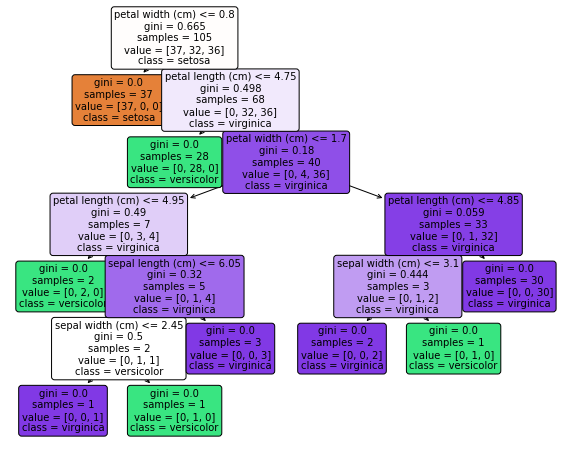

In [ ]:
from sklearn.tree import plot_tree
iris = load_iris()
plt.figure(figsize=(10,8))
plot_tree(dtc, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True, 
          rounded=True, fontsize=10);

También es interesante visualizar como el árbol particiona el espacio de entrada para realizar la clasificación. Veamos un ejemplo re-entrenando el árbol usando solo dos variables de entrada para poder representar el resultado.

In [ ]:
varx, vary = 2, 3
minx, maxx = np.min(X[:,varx]), np.max(X[:,varx])
miny, maxy = np.min(X[:,vary]), np.max(X[:,vary])

npoints = 50
xx = np.linspace(minx, maxx, npoints)
yy = np.linspace(miny, maxy, npoints)

# Rentrenamos el árbol usando solo varx y vary
dtc.fit(Xtrain[:,[varx, vary]], ytrain)

xx, yy = np.meshgrid(xx, yy)
zz = np.zeros((npoints, npoints))
for i in range(npoints):
    for j in range(npoints):
        zz[i,j] = dtc.predict(np.c_[xx[i,j], yy[i,j]])

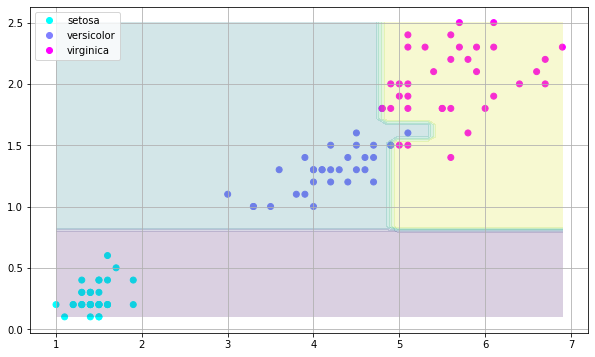

In [ ]:
plt.figure(figsize=(10,6))
sc = plt.scatter(Xtrain[:, varx], Xtrain[:, vary],
                 c=ytrain, cmap=plt.get_cmap('cool'))
plt.contourf(xx, yy, zz, alpha=0.2)
h, l = sc.legend_elements()
plt.legend(h, iris.target_names), plt.grid(1);

## Ejercicio 3
Utiliza `DecisionTreeClassifier` con el dataset `load_breast_cancer`.
- Entrena un modelo y muestra el árbol gráficamente.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
dtc = DecisionTreeClassifier()

# Generamos dataset de entrenamiento y test de nuevo.
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.3)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


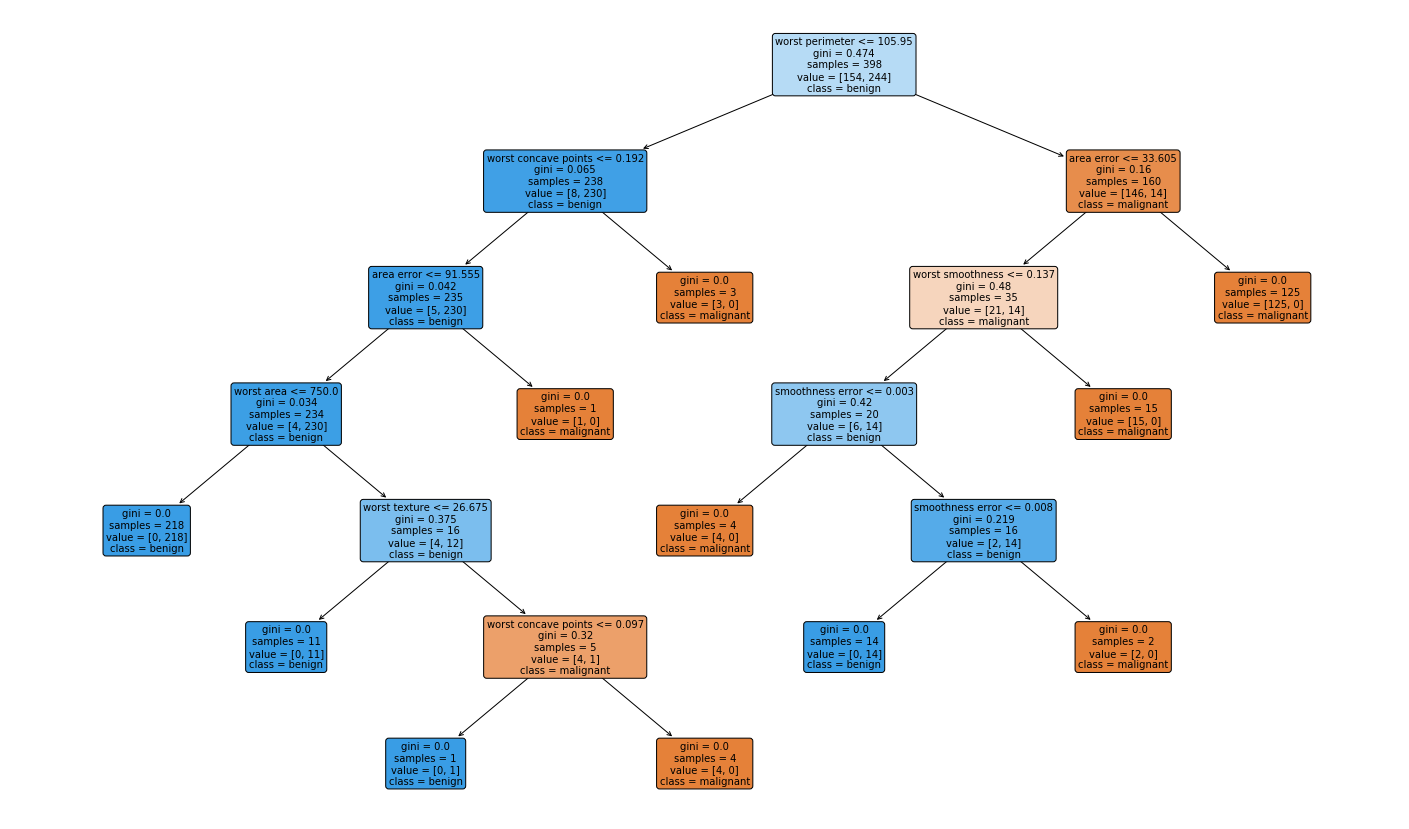

In [ ]:
from sklearn.tree import plot_tree
cancer = load_breast_cancer()
plt.figure(figsize=(25,15))
plot_tree(dtc, 
          feature_names=cancer.feature_names,
          class_names=cancer.target_names, 
          filled=True, 
          rounded=True, 
          fontsize=10);

- Identifica las variables más importantes.

In [ ]:
# Encontramos las varibles más importantes ordenadas: 
rank = np.argsort(dtc.feature_importances_)
dtc.feature_importances_[np.flip(rank)]
cancer.feature_names[np.flip(rank)]

array(['worst perimeter', 'area error', 'smoothness error',
       'worst smoothness', 'worst concave points', 'worst texture',
       'worst area', 'mean concavity', 'mean fractal dimension',
       'mean symmetry', 'mean concave points', 'mean area',
       'mean compactness', 'mean smoothness', 'texture error',
       'mean perimeter', 'mean texture', 'radius error',
       'worst fractal dimension', 'perimeter error', 'worst symmetry',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst compactness', 'worst concavity', 'mean radius'],
      dtype='<U23')

- Reduce la dimensionalidad del problema a 2 usando una PCA, rentrena el modelo y muestra la frontera de decisión en un espacio 2-D.

In [ ]:
# Reducimos la dimensionalidad a 2 usando la PCA:
from sklearn.decomposition import PCA

model = PCA(n_components = 3)
model.fit(cancer.data)
modelo = model.transform(cancer.data)

#Reentrenamos el modelo 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.3)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9239766081871345

In [ ]:
varx, vary = 2, 3
minx, maxx = np.min(X[:,varx]), np.max(X[:,varx])
miny, maxy = np.min(X[:,vary]), np.max(X[:,vary])

npoints = 50
xx = np.linspace(minx, maxx, npoints)
yy = np.linspace(miny, maxy, npoints)

# Rentrenamos el árbol usando solo varx y vary
dtc.fit(Xtrain[:,[varx, vary]], ytrain)

xx, yy = np.meshgrid(xx, yy)
zz = np.zeros((npoints, npoints))
for i in range(npoints):
    for j in range(npoints):
        zz[i,j] = dtc.predict(np.c_[xx[i,j], yy[i,j]])

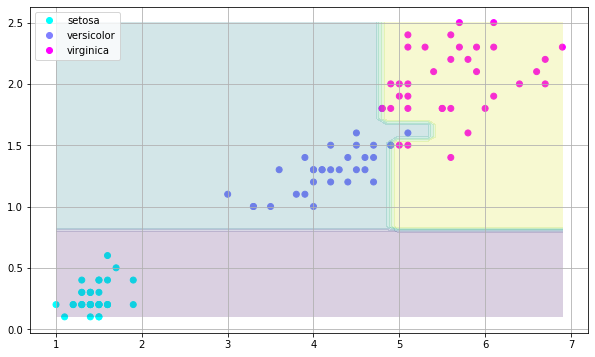

In [ ]:
# Mostramos la frontera de decisión en un espacio 2-D
plt.figure(figsize=(10,6))
sc = plt.scatter(Xtrain[:, varx], Xtrain[:, vary],
                 c=ytrain, cmap=plt.get_cmap('cool'))
plt.contourf(xx, yy, zz, alpha=0.2)
h, l = sc.legend_elements()
plt.legend(h, iris.target_names), plt.grid(1);